In [1]:
# 1 Write a Python script that calculates the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for a
# multiple linear regression model using Seaborn's "diamonds" datasetK

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [407]:
df = sns.load_dataset("diamonds")

In [409]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [411]:
categories = df.select_dtypes(include = "category")

In [412]:
categories.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [417]:
for i in categories.columns:
    print(f"value count of {i} is {df[i].value_counts()}")
    print()

value count of cut is cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

value count of color is color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

value count of clarity is clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64



In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
for i in categories.columns:
    df[i] = encoder.fit_transform(df[[i]])

In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
X = df.drop("price",axis = 1)
Y = df["price"]

In [15]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [16]:
#train and split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 1)

In [19]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
41944,0.35,3,4,2,62.4,58.0,4.47,4.54,2.81
21479,1.52,3,1,3,62.9,59.0,7.31,7.26,4.58
4451,0.90,2,2,3,61.9,56.0,6.18,6.23,3.84
24948,1.70,3,3,2,62.1,57.0,7.61,7.55,4.71
7281,1.00,3,1,3,61.0,62.0,6.41,6.34,3.89
...,...,...,...,...,...,...,...,...,...
50057,0.70,4,5,5,62.8,59.0,5.56,5.61,3.51
32511,0.40,1,1,3,63.9,57.0,4.71,4.65,2.99
5192,0.91,4,3,5,62.7,63.0,6.05,6.00,3.78
12172,1.18,2,6,4,61.7,56.0,6.79,6.82,4.20


In [20]:
x_train.shape

(40455, 9)

In [21]:
x_test.shape

(13485, 9)

In [22]:
#standard scaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [28]:
x_train = scaler.fit_transform(x_train)


In [30]:
x_test = scaler.transform(x_test)

In [32]:
#model training

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [64]:
for i,value in enumerate(X.columns):
    print(f"the coef of{i} is {model.coef_[i]}")


the coef of0 is 5139.505032972452
the coef of1 is 74.70613996787029
the coef of2 is -454.6944858884697
the coef of3 is 493.5743687243172
the coef of4 is -217.5797787677924
the coef of5 is -208.20924407637426
the coef of6 is -1247.9583197379739
the coef of7 is 31.93936052804395
the coef of8 is 21.19472758570089


In [66]:
y_pred = model.predict(x_test)

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [72]:
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("Mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("rquare",r2_score(y_test,y_pred))

mean_squared_error 1726889.5834561577
Mean_absolute_error 853.356818403394
rquare 0.8883170094935269


In [74]:
# 2 Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and
# Root Mean Squared Error (RMSE) for a linear regression model

In [84]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split


In [80]:
x,y = make_regression(n_samples = 100,n_features = 1,noise = 0.1,random_state = 12)

In [82]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [88]:
model.coef_

array([35.55494303])

In [90]:
model.intercept_

-0.01900755071148108

In [92]:
y_pred = model.predict(x_test)

In [96]:
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

mean_squared_error 0.012358641748125667
mean_absolute_error 0.08059876771335003
RMSE 0.11116942811819114


In [102]:
# 3 Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
# linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearityK

In [135]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 5
data = pd.DataFrame({"X": X.flatten(), "y": y})
data
x = data[["X"]]
y = data["y"]

In [137]:
x

,X
0,3.745401
1,9.507143
2,7.319939
3,5.986585
4,1.560186
...,...
95,4.937956
96,5.227328
97,4.275410
98,0.254191


In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [141]:
model3 = LinearRegression()

In [143]:
model3.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [145]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 37141.99752540486


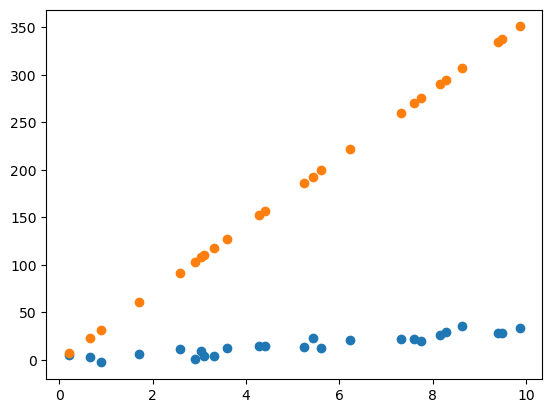

In [157]:
#linearty
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

In [159]:
error = y_test - y_pred

<Axes: xlabel='y', ylabel='Density'>

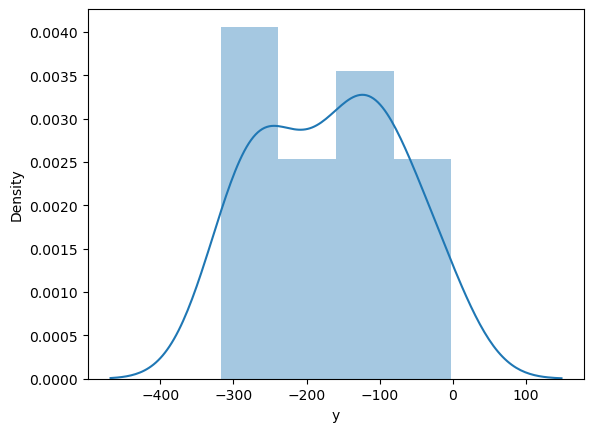

In [161]:
#normality of error
sns.distplot(error)

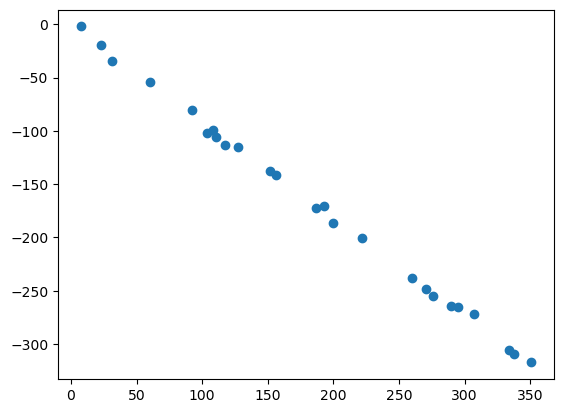

In [163]:
#homoscedality
plt.scatter(y_pred,error)

<Axes: >

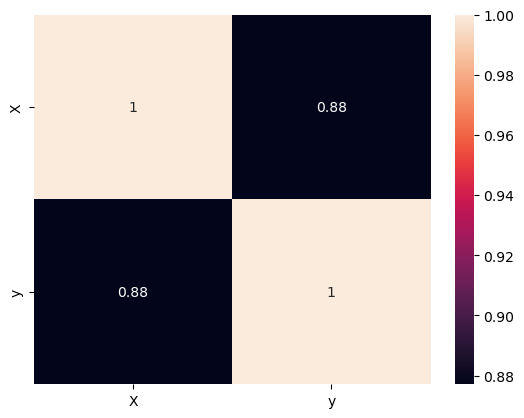

In [167]:
sns.heatmap(data.corr(),annot = True)

In [169]:
# 4 Create a machine learning pipeline that standardizes the features, fits a linear regression model, and
# evaluates the model’s R-squared score

In [171]:
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Two features for multivariate regression
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 5
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [179]:
pipeline = Pipeline([('standard',StandardScaler()),('Linear',LinearRegression())])

In [181]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('standard', StandardScaler()), ('Linear', LinearRegression())])

In [183]:
y_pred = pipeline.predict(x_test)

In [185]:
r2_score(y_test,y_pred)

0.6773995339581576

In [187]:
# 5 Implement a simple linear regression model on a dataset and print the model's coefficients, intercept,
# and R-squared score

In [189]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [205]:
df = sns.load_dataset('diamonds')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [209]:
categories = [i for i in df.columns if df[i].dtypes == "category"]

In [211]:
categories

['cut', 'color', 'clarity']

In [213]:
from sklearn.preprocessing import LabelEncoder

In [215]:
encoder = LabelEncoder()

In [223]:
for i in categories:
    df[i] = encoder.fit_transform(df[[i]])

In [225]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [227]:
x = df.drop("price",axis = 1)
y = df["price"]

In [229]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [238]:
x_train.shape

(40455, 9)

In [232]:
model4 = LinearRegression()

In [240]:
model4.fit(x_train,y_train)

LinearRegression()

In [248]:
for i ,value in enumerate(x_train.columns):
    print(f"coef_ is {value} is {model4.coef_[i]}")
model4.coef_

coef_ is carat is 10786.635799908781
coef_ is cut is 72.82457338179381
coef_ is color is -267.5464856202644
coef_ is clarity is 286.28868417766836
coef_ is depth is -151.9815371141055
coef_ is table is -93.20482731992902
coef_ is x is -1107.8883301341084
coef_ is y is 27.632198617647077
coef_ is z is 29.783704628877103


array([10786.63579991,    72.82457338,  -267.54648562,   286.28868418,
        -151.98153711,   -93.20482732, -1107.88833013,    27.63219862,
          29.78370463])

In [250]:
model4.intercept_

15565.113682508032

In [252]:
y_pred =model4.predict(x_test)

In [254]:
r2_score(y_test,y_pred)

0.8883170094935268

In [257]:
# 6 Fit a simple linear regression model to the 'tips' dataset and print the slope and intercept of the regression
# lineK

In [259]:
df = sns.load_dataset('tips')

In [261]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [313]:
x = df[['total_bill']]
y = df['tip']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [314]:
model = LinearRegression()

In [317]:
model.fit(x_train,y_train)

LinearRegression()

In [318]:
model.coef_

array([0.09865334])

In [321]:
model.intercept_

1.033680792881078

In [322]:
y_pred = model.predict(x_test)

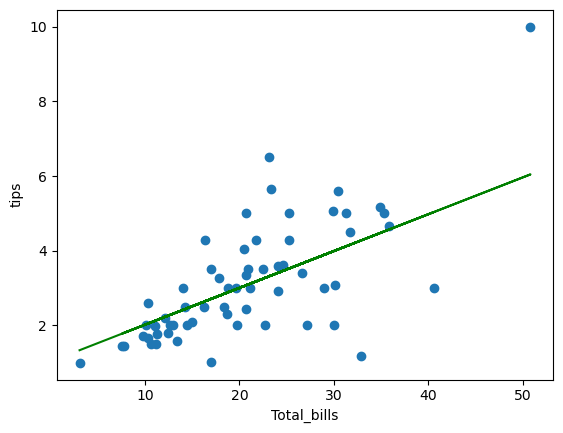

In [327]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = 'green')
plt.xlabel("Total_bills")
plt.ylabel("tips")
plt.show()

In [303]:
# 7 Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
# model to predict new values and plot the data points along with the regression line

Slope (Coefficient): 3.862
Intercept: 7.645


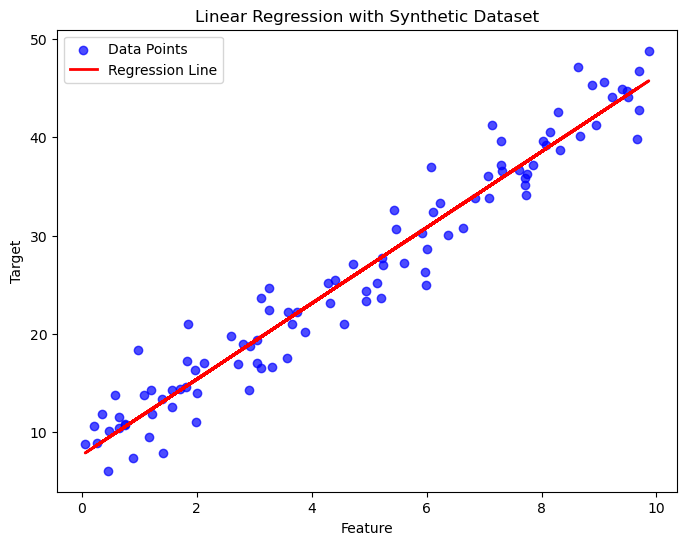

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Single feature
y = 4 * X.flatten() + 7 + np.random.randn(100) * 3  # Linear relationship with noise


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope:.3f}")
print(f"Intercept: {intercept:.3f}")

# Step 5: Plot the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.7, label="Data Points")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.title("Linear Regression with Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [339]:
# 8 Write a Python script that pickles a trained linear regression model and saves it to a file

In [331]:
import pickle

In [333]:
pickle.dump(model,open("model.pkl","wb"))

In [335]:
model = pickle.load(open("model.pkl","rb"))

In [337]:
model.coef_

array([0.09865334])

In [341]:
# 9 Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
# regression curve

In [343]:
np.random.seed(1)

In [345]:
x = 2*np.random.rand(100,1)
y = 4+3*x+2*x**2 + np.random.rand(100,1)

In [347]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [349]:
x_train

array([[2.28749635e-04],
       [1.61478258e+00],
       [1.14735897e+00],
       [1.38880032e+00],
       [3.96202978e-01],
       [6.31031262e-01],
       [8.16273606e-01],
       [7.81095665e-02],
       [1.81719101e+00],
       [3.65765547e-02],
       [1.02977822e+00],
       [1.23428983e+00],
       [9.83146319e-01],
       [4.74053960e-01],
       [1.32688300e+00],
       [1.97772218e+00],
       [5.75550677e-01],
       [1.39951672e+00],
       [1.38464523e+00],
       [1.38375423e+00],
       [8.56182380e-01],
       [5.31093319e-01],
       [6.95531719e-01],
       [1.34093502e+00],
       [6.97796684e-01],
       [1.49633131e+00],
       [8.95787052e-01],
       [1.89897852e+00],
       [1.70088423e-01],
       [5.74065406e-03],
       [1.57855866e+00],
       [1.06725090e-01],
       [1.75277830e+00],
       [2.93511782e-01],
       [1.17861107e+00],
       [2.60057144e-01],
       [1.93652315e+00],
       [1.92968009e+00],
       [6.04665145e-01],
       [7.95353674e-01],


In [351]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2,include_bias = False)

In [353]:
poly.get_params()

{'degree': 2, 'include_bias': False, 'interaction_only': False, 'order': 'C'}

In [355]:
x_train_poly = poly.fit_transform(x_train)

In [357]:
x_test_poly = poly.transform(x_test)

In [359]:
model = LinearRegression()

In [361]:
model.fit(x_train_poly,y_train)

LinearRegression()

In [363]:
y_pred  = model.predict(x_test_poly)

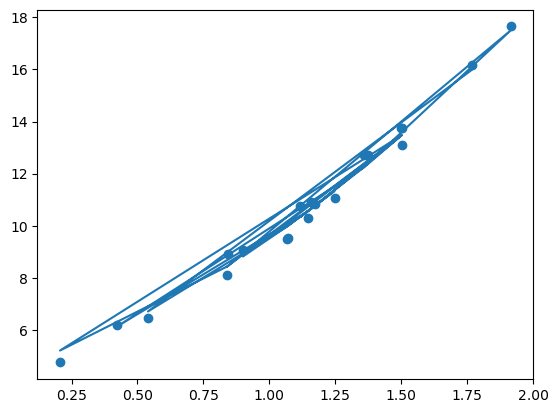

In [381]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [383]:
# 10 Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
# regression model to the data. Print the model's coefficient and interceptK

Slope (Coefficient): 3.908
Intercept: 6.430


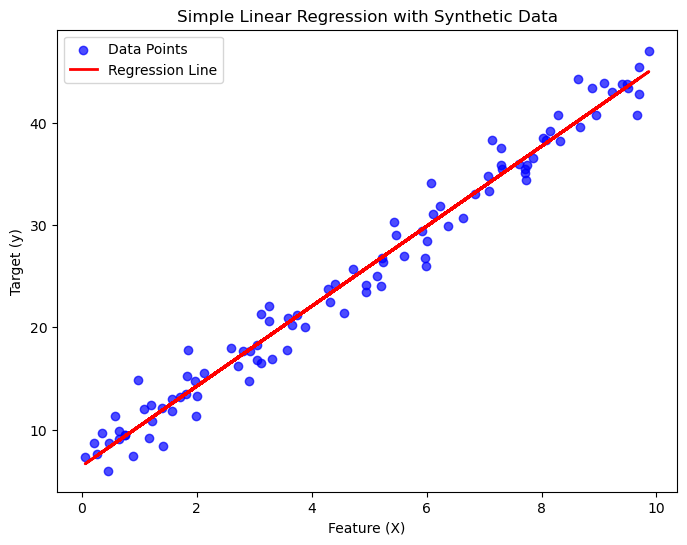

rsquare 0.9764567983510799


In [630]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Random values for X (scaled to range 0–10)
y = 4 * X.flatten() + 6 + np.random.randn(100) * 2  # Linear relationship with noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Print the model's coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope:.3f}")
print(f"Intercept: {intercept:.3f}")

# Step 4: Optional - Visualize the data and the regression line
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.7, label="Data Points")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression with Synthetic Data")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

y_pred = model.predict(X)
print("rsquare",r2_score(y,y_pred))

In [387]:
# 11 Write a Python script that fits a polynomial regression model (degree 3) to a synthetic non-linear dataset
# and plots the curve

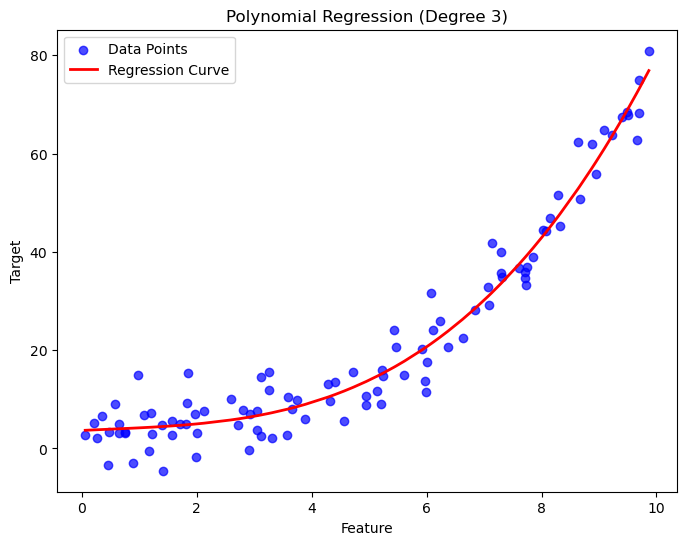

Coefficients: [ 0.56292997 -0.11064218  0.08160798]
Intercept: 3.67229953334218


In [389]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic non-linear dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Single feature
y = 0.1 * X.flatten()**3 - 0.5 * X.flatten()**2 + 3 * X.flatten() + np.random.randn(100) * 5  # Cubic relationship with noise

# Step 2: Transform the feature to include polynomial terms (degree 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Step 3: Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict using the model
y_pred = model.predict(X_poly)

# Step 5: Plot the original data points and the regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.7, label="Data Points")
sorted_indices = np.argsort(X.flatten())  # Sort indices for plotting
plt.plot(X.flatten()[sorted_indices], y_pred[sorted_indices], color="red", linewidth=2, label="Regression Curve")
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

# Step 6: Print model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


In [391]:
#12 Write a Python script that fits a simple linear regression model with two features and prints the model's
#coefficients, intercept, and R-squared scoreK

In [392]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Two features
y = 3 * X[:, 0] + 5 * X[:, 1] + 10 + np.random.randn(100) * 2  # Linear relationship with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print coefficients, intercept, and R-squared score
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"R-squared Score: {r2:.3f}")


Model Coefficients: [3.05090271 5.09483198]
Intercept: 9.433342998779366
R-squared Score: 0.985


In [396]:
# 13 Write a Python script that generates a synthetic dataset, fits a linear regression model, and calculates the
#Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)K

In [397]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y = 4 * X.flatten() + 7 + np.random.randn(100) * 2  # Linear relationship with noise

# Step 2: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 6: Print the results
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Mean Squared Error (MSE): 2.615
Mean Absolute Error (MAE): 1.183
Root Mean Squared Error (RMSE): 1.617


In [401]:
# 14 Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a
# dataset with multiple featuresK

In [425]:
df = sns.load_dataset('diamonds')

In [426]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [429]:
categories = df.select_dtypes(include = 'category')

In [431]:
categories

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [433]:
for i in categories.columns:
    df[i] = encoder.fit_transform(df[[i]])

In [435]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [437]:
x = df.drop("price",axis = 1)
y = df["price"]

In [443]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [445]:
vif = pd.DataFrame()

In [447]:
vif["features"] = x.columns

In [449]:
vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,VIF
0,carat,71.280619
1,cut,7.452458
2,color,3.656752
3,clarity,6.216738
4,depth,532.475672
5,table,521.222987
6,x,1285.950850
7,y,531.783819
8,z,542.223353


In [455]:
x = df.corr()

In [459]:
x[["price"]].drop("price")

,price
carat,0.921591
cut,0.039860
color,0.172511
clarity,-0.071535
depth,-0.010647
table,0.127134
x,0.884435
y,0.865421
z,0.861249


In [461]:
# 15 Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
# polynomial regression model, and plots the regression curveK

In [463]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Single feature
y = 0.05 * X.flatten()**4 - 0.4 * X.flatten()**3 + 1.5 * X.flatten()**2 - 2 * X.flatten() + 5 + np.random.randn(100) * 50

In [491]:
poly = PolynomialFeatures(degree = 4, include_bias = False)
model = LinearRegression()

In [492]:
x_ploy  = poly.fit_transform(X)

In [495]:
model.fit(x_ploy,y)

LinearRegression()

In [496]:
y_pred = model.predict(x_ploy)

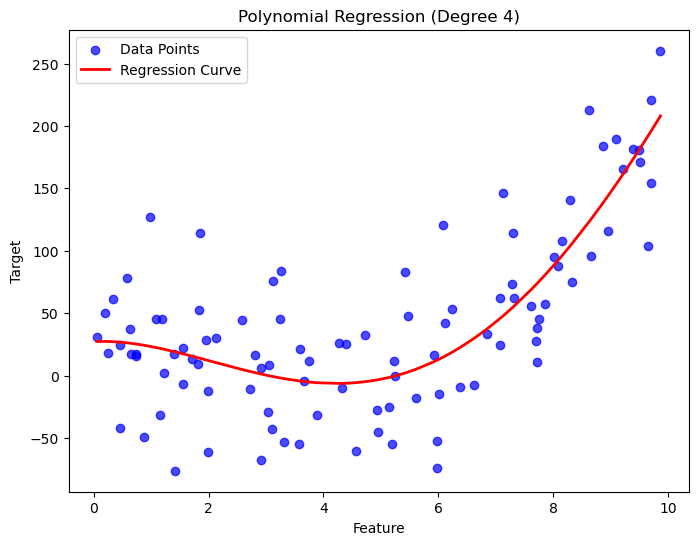

In [497]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.7, label="Data Points")
sorted_indices = np.argsort(X.flatten())  # Sort indices for plotting
plt.plot(X.flatten()[sorted_indices], y_pred[sorted_indices], color="red", linewidth=2, label="Regression Curve")
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [501]:
# 16 Write a Python script that creates a machine learning pipeline with data standardization and a multiple
# linear regression model, and prints the R-squared score

In [503]:
from sklearn.pipeline import Pipeline

In [519]:
np.random.seed(42)
X = np.random.rand(100, 4) * 10  # Three features
y = 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + 7 + np.random.randn(100) * 2  # Linear relationship with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [520]:
pipline = Pipeline([("standard",StandardScaler()),("linear",LinearRegression())])

In [523]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('standard', StandardScaler()), ('linear', LinearRegression())])

In [524]:
y_pred = model.predict(X_test)

In [533]:
print("r2_score",r2_score(y_test,y_pred))

r2_score -12.381077606707848


In [537]:
#17 Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
#regression curve

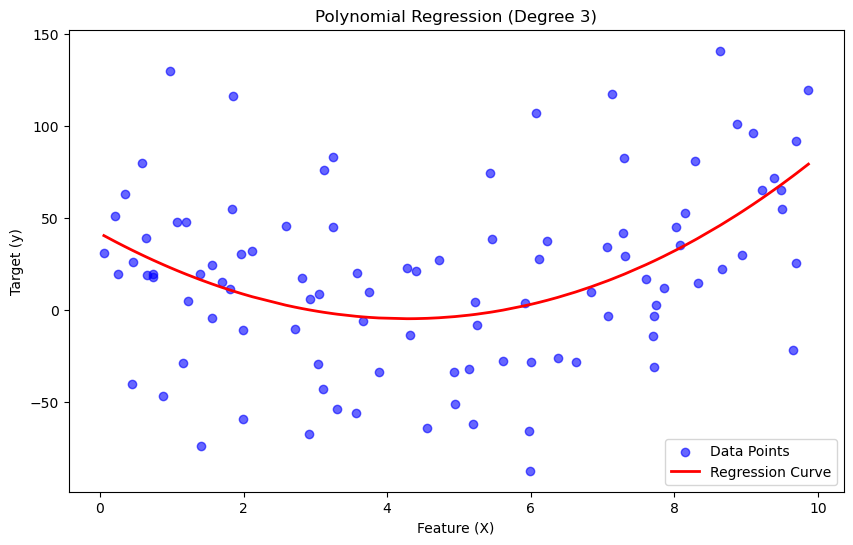

Coefficients: [-2.13707003e+01  2.39357817e+00  1.60797810e-02]
Intercept: 41.722995333421984


In [535]:

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Single feature
y = 0.2 * X.flatten()**3 - 1.5 * X.flatten()**2 + 3 * X.flatten() + 5 + np.random.randn(100) * 50  # Cubic relationship with noise

# Step 2: Transform features to include polynomial terms (degree 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Step 3: Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict using the model
y_pred = model.predict(X_poly)

# Step 5: Plot the original data points and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Data Points")
sorted_indices = np.argsort(X.flatten())  # Sort indices for plotting
plt.plot(X.flatten()[sorted_indices], y_pred[sorted_indices], color="red", linewidth=2, label="Regression Curve")
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Step 6: Print model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


In [541]:
#18 Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
#the R-squared score and model coefficientsK

In [539]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 5) * 10  # 5 features
y = 2 * X[:, 0] + 3 * X[:, 1] - 1.5 * X[:, 2] + 4 * X[:, 3] + 0.5 * X[:, 4] + 10 + np.random.randn(200) * 2  # Linear relationship with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Step 6: Print the results
print("R-squared Score:", round(r2, 3))
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared Score: 0.981
Model Coefficients: [ 2.01418966  2.94075131 -1.51883907  4.02564896  0.50358283]
Intercept: 10.423776904724832


In [546]:
#19 Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
#data points along with the regression line.

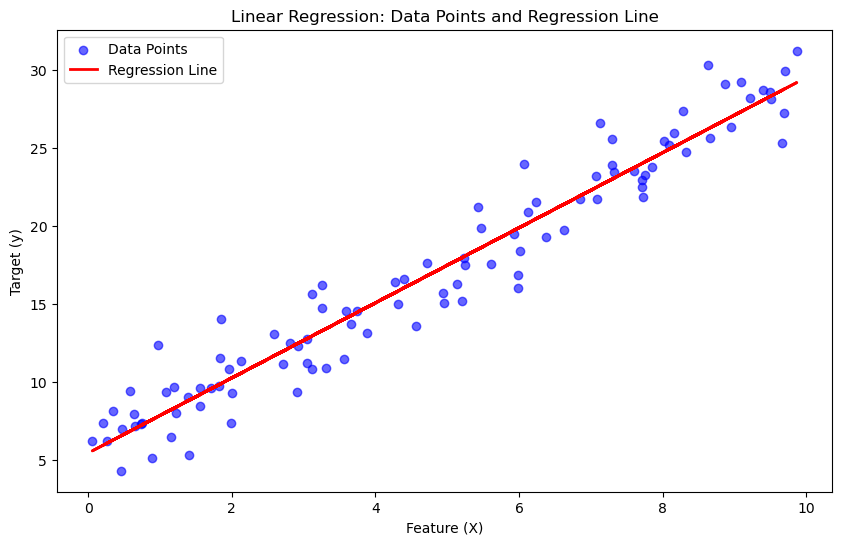

Model Slope (Coefficient): 2.408
Model Intercept: 5.430


In [544]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points, single feature
y = 2.5 * X.flatten() + 5 + np.random.randn(100) * 2  # Linear relationship with noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict using the model
y_pred = model.predict(X)

# Step 4: Visualize the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Data Points")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.title("Linear Regression: Data Points and Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Step 5: Print the model's slope and intercept
print(f"Model Slope (Coefficient): {model.coef_[0]:.3f}")
print(f"Model Intercept: {model.intercept_:.3f}")


In [550]:
#20 Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients6

In [548]:

np.random.seed(42)
X = np.random.rand(200, 3) * 10  # 200 samples, 3 features
y = 3.5 * X[:, 0] + 2.0 * X[:, 1] - 1.2 * X[:, 2] + 10 + np.random.randn(200) * 2  # Linear relationship with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Step 6: Print the results
print("R-squared Score:", round(r2, 3))
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared Score: 0.984
Model Coefficients: [ 3.49548013  1.92615081 -1.24275096]
Intercept: 10.490554881772798


In [556]:
#21 Write a Python script to pickle a trained linear regression model, save it to a file, and load it back for
#prediction

In [558]:
import pickle
pickle.dump(model,open("modelz.pkl","wb"))

In [562]:
model = pickle.load(open("modelz.pkl","rb"))

In [564]:
model.coef_

array([ 3.49548013,  1.92615081, -1.24275096])

In [566]:
y_pred = model.predict(X)

In [568]:
r2_score(y,y_pred)

0.9742984446470959

In [570]:
#22 6 Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
#the Seaborn 'tips' dataset

In [572]:
df = sns.load_dataset('tips')

In [574]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [578]:
from sklearn.preprocessing import OneHotEncoder

In [580]:
encoder = OneHotEncoder()

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [584]:
categories = df.select_dtypes(include = "category")

In [586]:
categories

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [594]:
encoded = encoder.fit_transform(categories).toarray()

In [596]:
dataframe = pd.DataFrame(encoded,columns = encoder.get_feature_names_out())
dataframe

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [598]:
df = pd.concat([df,dataframe],axis = 1)

In [600]:
df

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [616]:
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [622]:
x = df.iloc[:,1:]
y = df.iloc[:,0]


In [626]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
r2_score(y,y_pred)

0.5815555260671151

In [634]:
#23 Compare Ridge Regression 
#with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score

In [628]:
# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Random values for X (scaled to range 0–10)
y = 4 * X.flatten() + 6 + np.random.randn(100) * 2  # Linear relationship with noise


In [632]:
#r2_score in LinearRegression is 0.9764567983510799

In [638]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X,y)
y_predict = ridge.predict(X)
print("Rsqure of ridge",r2_score(y,y_predict))


Rsqure of ridge 0.9764564807067836


In [644]:
#24 Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
#dataset

In [642]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Step 1: Generate a synthetic dataset
X, y = make_regression(n_samples=200, n_features=3, noise=10, random_state=42)

# Step 2: Define the Linear Regression model
model = LinearRegression()

# Step 3: Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

# Step 4: Print the results
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", np.mean(cv_scores))
print("Standard Deviation of R-squared Scores:", np.std(cv_scores))


Cross-Validation R-squared Scores: [0.98646057 0.98856667 0.99236792 0.98571393 0.99053516]
Mean R-squared Score: 0.988728850262613
Standard Deviation of R-squared Scores: 0.0024805934855771854


In [663]:
#25 Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each

In [650]:
np.random.seed(42)
X = np.random.rand(200, 1) * 10  # 200 data points, single feature
y = 3 * X.flatten()**3 - 5 * X.flatten()**2 + 2 * X.flatten() + 10 + np.random.randn(200) * 50 

In [652]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
degrees = [1,2,3,4]
result = {}

for degree in degrees:
    poly = PolynomialFeatures(degree = degree,include_bias = False)
    x_train_poly=poly.fit_transform(x_train)
    x_test_poly=poly.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly,y_train)
    y_pred = model.predict(x_test_poly)
    result[degree] = r2_score(y_test,y_pred)

In [654]:
for key,value in result.items():
    print(f"degree{key} and value {value}")

degree1 and value 0.7929874777289401
degree2 and value 0.9920912601987517
degree3 and value 0.9934891173916736
degree4 and value 0.9934679262069136


In [667]:
#26  Write a Python script that adds interaction terms to a linear regression model and prints the coefficients.

In [665]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 2) * 10  # Two features
y = 3 * X[:, 0] + 2 * X[:, 1] + 1.5 * X[:, 0] * X[:, 1] + np.random.randn(n_samples) * 5  # Includes interaction term

# Step 2: Add interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X)

# Step 3: Fit a linear regression model
model = LinearRegression()
model.fit(X_interaction, y)

# Step 4: Print the results
feature_names = poly.get_feature_names_out(input_features=["Feature1", "Feature2"])
coefficients = model.coef_

print("Feature Names with Interaction Terms:")
print(feature_names)
print("\nCoefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

print("\nIntercept:", model.intercept_)


Feature Names with Interaction Terms:
['Feature1' 'Feature2' 'Feature1 Feature2']

Coefficients:
Feature1: 2.793
Feature2: 1.861
Feature1 Feature2: 1.569

Intercept: 0.6163018683634505


In [669]:
t1 = (1,2,3)
t2 = (4,5,6)

In [671]:
q = zip(t1,t2)

In [677]:

for i,j in q:
    

AttributeError: 'zip' object has no attribute 'items'